In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Q1**

In [3]:
sides = np.array([1,2,3,4,5,6])

In [4]:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([sides[i],sides[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

In [5]:
N = 1000
d1 = np.random.choice(sides, size=N)
d2 = np.random.choice(sides, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

In [6]:
ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= sides[i] )

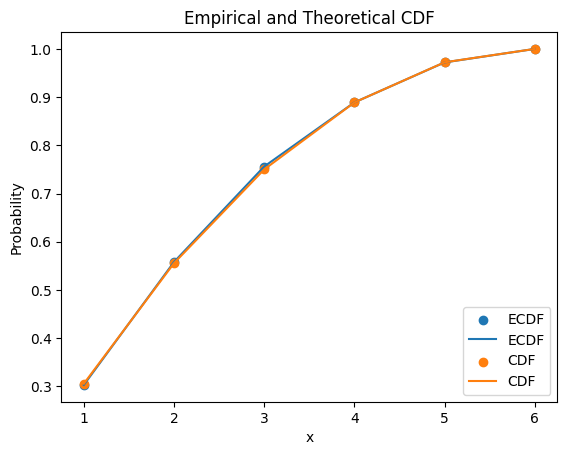

In [7]:
plt.scatter(sides,ecdf,label='ECDF')
plt.plot(sides,ecdf,label='ECDF')
plt.scatter(sides,cdf,label='CDF')
plt.plot(sides,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

In [8]:
sides = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(sides, size=N)
d2 = np.random.choice(sides, size=N)
d3 = np.random.choice(sides, size=N)
roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

In [9]:
expected_value = np.sum(roll)/N
print('Expected value: ', expected_value)

Expected value:  3.4948


In [10]:
ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( roll <= sides[i] )
    single[i] = (1/N)*np.sum( d1 <= sides[i] )

In [11]:
expected_value = np.sum(roll)/N

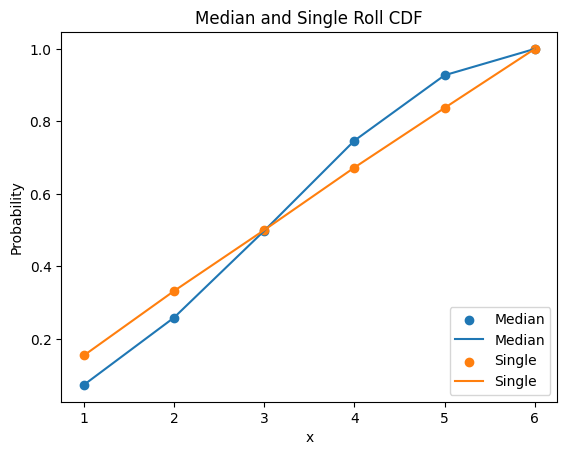

In [12]:
plt.scatter(sides,ecdf,label='Median')
plt.plot(sides,ecdf,label='Median')
plt.scatter(sides,single,label='Single')
plt.plot(sides,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

In [13]:
N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(sides, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

In [15]:
results = pd.DataFrame(results)
print(results.describe())

                  0
count  50000.000000
mean       4.226940
std        3.290175
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       41.000000


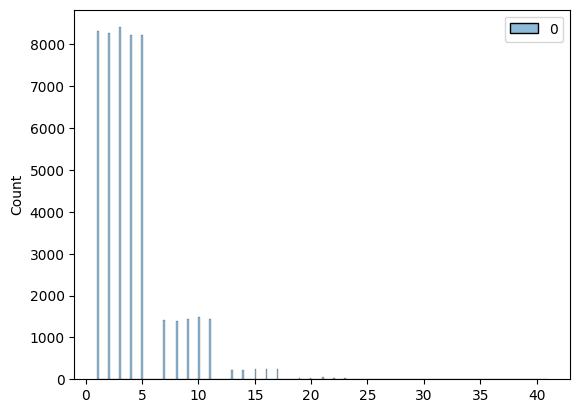

In [16]:
sns.histplot(results)
plt.show()

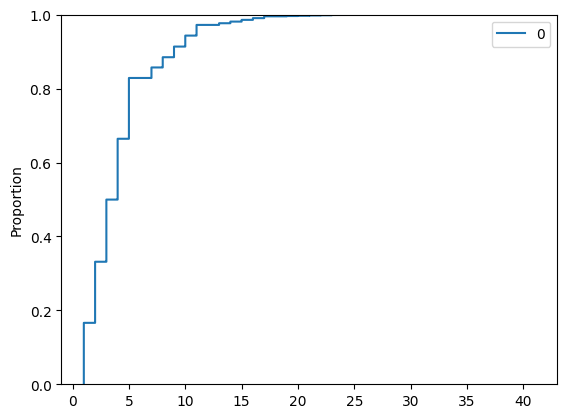

In [17]:
sns.ecdfplot(results)
plt.show()

**Q2**

In [18]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

In [19]:
print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



In [20]:
raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

Raw treatment effect:  0.00011505110015985753


In [21]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

In [22]:
treat = df.loc[ df['treatment'] == 'mammogram', :]
control = df.loc[ df['treatment'] == 'control', :]

In [23]:
S = 5000
fx = []
for t in range(S):
    treat_t = treat.sample( treat.shape[0], axis=0, replace=True)
    control_t = control.sample( control.shape[0], axis=0, replace=True)

    treatment_effect_t = np.mean(treat_t['survive']) - np.mean(control_t['survive'])
    fx.append(treatment_effect_t)

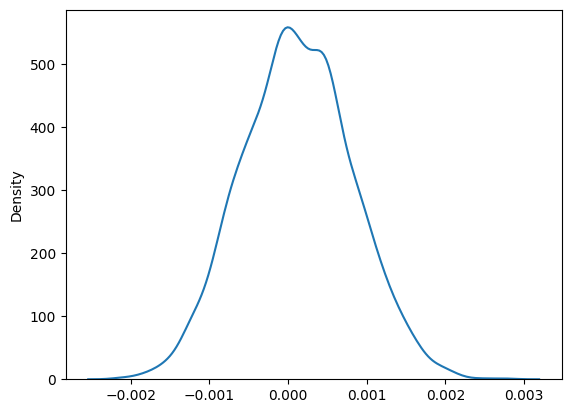

In [24]:
sns.kdeplot(fx)
plt.show()

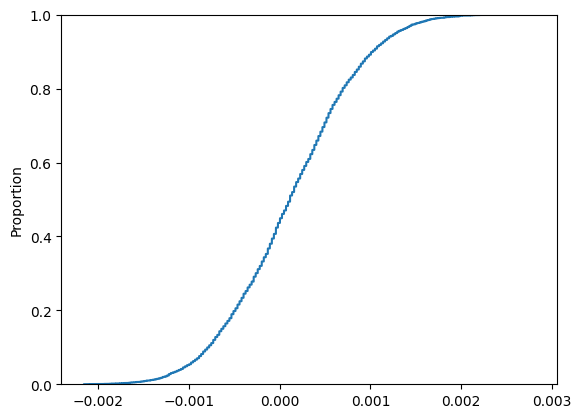

In [25]:
sns.ecdfplot(fx)
plt.show()

In [26]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

In [27]:
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.001599287426643301 ,  0.0019185985400592255 )


The confidence interval includes zero, indicating that getting a mammogram does not result in a statistically signficant difference in 25-year survival rates. This data may overstate the conclusions I reached because the lack of accounting for confounding variables such as lifestyle, genetic predispositions, etc. It may understate the conclusions due to the study not accounting for the advancement of treatments and technology over the 25 year period. To better understand or criticize these results, I'd like more information on patient demographics, cancer stage at diagnosis, and access to quality care.